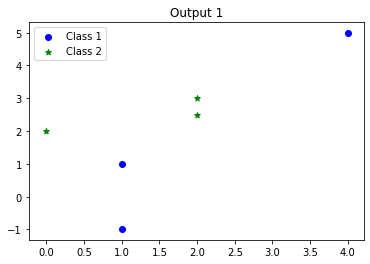

In [1]:
import matplotlib.pyplot as plt

import numpy as np

a=np.loadtxt('train-perceptron.txt') 
#print(a)

#### task 1
class1=[]
class2=[]
for i in a:
    if i[2]==1:
        class1.append(i)
    else:
        class2.append(i)
class1=np.array(class1)
class2=np.array(class2)

x1=class1[:,0]
y1=class1[:,1]
x2=class2[:,0]
y2=class2[:,1]

fig,ax=plt.subplots()
plt.title("Output 1")
ax.scatter(x1, y1, marker='o',color='b',label='Class 1')
ax.scatter(x2, y2, marker='*',color='g',label='Class 2')
ax.legend()






In [2]:
### task 2
def phii(x1,x2):
    return np.array([x1*x1, x2*x2, x1*x2, x1, x2, 1])

y=[]
# phii func of class 1
for i in range(len(x1)):
    y.append(phii(x1[i],y1[i]))
# phii funcof class 2
for i in range(len(x2)):
    temp = phii(x2[i],y2[i])
    #negating class 2 for normalization
    y.append(np.dot(temp,-1))
    
y=np.array(y)
print("Output 2:")
print(y)


Output 2:
[[ 1.    1.    1.    1.    1.    1.  ]
 [ 1.    1.   -1.    1.   -1.    1.  ]
 [16.   25.   20.    4.    5.    1.  ]
 [-4.   -6.25 -5.   -2.   -2.5  -1.  ]
 [ 0.   -4.    0.    0.   -2.   -1.  ]
 [-4.   -9.   -6.   -2.   -3.   -1.  ]]


In [3]:
### task 3

def Batch( weight,alpha):
    i=0
    while(i<200):
        flag =0; #initilally all classified
        sum = np.zeros_like(y[0])
        wy=[]
        for j in range(len(y)):
            wy.append(np.dot(weight,y[j])) #multiplication of wTy
            if(wy[j] <= 0):
                flag=1 #misclassified detected
                sum = sum + y[j] #summation of misclassified data
                 
        weight = weight + (alpha * sum) 
        if(flag == 0):
               return i+1
        i=i+1
    return i+1 #if iteration exists 200 , it will return 200   
        

In [4]:
def Single( weight,alpha):
    i=0
    while(i<200):
        flag =0; #initilally all classified
        
        wy=[]
        for j in range(len(y)):
            wy.append(np.dot(weight,y[j])) #multiplication of wTy
            if(wy[j] <= 0):
                flag=1 #misclassified detected
                sum = np.zeros_like(y[0])
                sum = sum + y[j] #summation of misclassified data
                weight = weight + (alpha * sum)  
        
        if(flag == 0):
               return i+1
        i=i+1
    return i+1 #if iteration exists 200 , it will return 200   
        

Weight- All Zero
Alpha(Learning Rate)	One at a Time	Many at a Time
	0.1		94		105
	0.2		94		105
	0.3		94		92
	0.4		94		105
	0.5		94		92
	0.6		94		105
	0.7		94		105
	0.8		94		105
	0.9		94		105
	1.0		94		92


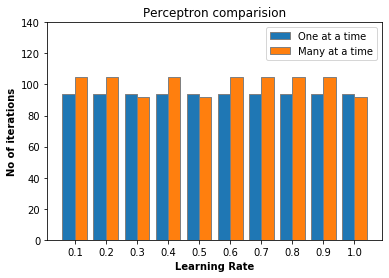

In [7]:
### task 4 
####### weight - All Zero
w=np.zeros_like(y[0])
one=[]
many=[]
alpha_arr =[]
print("Weight- All Zero")
print("Alpha(Learning Rate)\tOne at a Time\tMany at a Time")

for alpha in np.arange(0.1,1.1,0.1):
    alpha_arr.append(alpha)
    one.append(Single(w,alpha))
    many.append(Batch(w,alpha))
    print("\t{:.1f}".format(alpha) + "\t\t" + str(Single(w,alpha))+ "\t\t" + str(Batch(w,alpha)))
    
    
### bar-chart
barWidth = 0.4
br1 = np.arange(10) 
br2 = [x + barWidth for x in br1] 

# Make the plot 
plt.bar(br1, one, width = barWidth,
        edgecolor ='grey', label ='One at a time') 
plt.bar(br2, many, width = barWidth,
        edgecolor ='grey', label ='Many at a time') 
  
# Adding Xticks  
plt.title('Perceptron comparision')
plt.xlabel('Learning Rate', fontweight ='bold') 
plt.ylabel('No of iterations', fontweight ='bold') 
plt.xticks([r + (barWidth/2) for r in range(10)], [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]) 
plt.ylim(0, 140)
plt.legend()
plt.show() 


Weight - All One
Alpha(Learning Rate)	One at a Time	Many at a Time
	0.1		6		102
	0.2		92		104
	0.3		104		91
	0.4		106		116
	0.5		93		105
	0.6		93		114
	0.7		108		91
	0.8		115		91
	0.9		94		105
	1.0		94		93


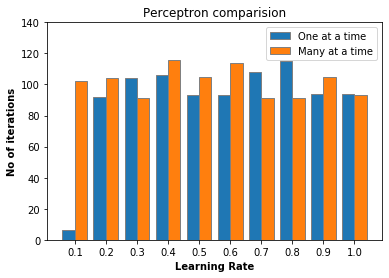

In [14]:
####### weight - All one   
w1=np.ones_like(y[0])
one=[]
many=[]
alpha_arr =[]
print("Weight - All One")
print("Alpha(Learning Rate)\tOne at a Time\tMany at a Time")
for alpha in np.arange(0.1,1.1,0.1):
    alpha_arr.append(alpha)
    one.append(Single(w1,alpha))
    many.append(Batch(w1,alpha))
    print("\t{:.1f}".format(alpha) + "\t\t" + str(Single(w1,alpha))+ "\t\t" + str(Batch(w1,alpha)))


### bar-chart
barWidth = 0.4
br1 = np.arange(10) 
br2 = [x + barWidth for x in br1] 

# Make the plot 
plt.bar(br1, one, width = barWidth, 
        edgecolor ='grey', label ='One at a time') 
plt.bar(br2, many, width = barWidth, 
        edgecolor ='grey', label ='Many at a time') 
  
# Adding Xticks 
plt.title('Perceptron comparision')
plt.xlabel('Learning Rate', fontweight ='bold') 
plt.ylabel('No of iterations', fontweight ='bold') 
plt.xticks([r + (barWidth/2) for r in range(10)], [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]) 
plt.ylim(0, 140)
plt.legend()
plt.show() 

[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411]
Weight - Random
Alpha(Learning Rate)	One at a Time	Many at a Time
	0.1		105		98
	0.2		109		104
	0.3		93		105
	0.4		108		117
	0.5		96		106
	0.6		94		106
	0.7		97		101
	0.8		84		105
	0.9		94		122
	1.0		105		88


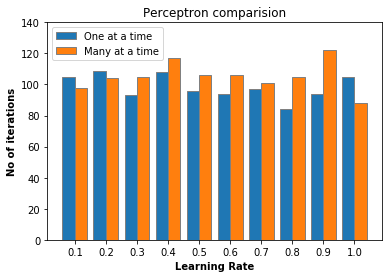

In [16]:
np.random.seed(0)
# weight vector Random
w2 = np.random.rand( len(y[0]))
print(w2)
one=[]
many=[]
alpha_arr =[]

print("Weight - Random")
print("Alpha(Learning Rate)\tOne at a Time\tMany at a Time")

for alpha in np.arange(0.1,1.1,0.1):
    alpha_arr.append(alpha)
    one.append(Single(w2,alpha))
    many.append(Batch(w2,alpha))
    print("\t{:.1f}".format(alpha) + "\t\t" + str(Single(w2,alpha))+ "\t\t" + str(Batch(w2,alpha)))

### bar-chart
barWidth = 0.4
br1 = np.arange(10) 
br2 = [x + barWidth for x in br1] 

# Make the plot 
plt.bar(br1, one, width = barWidth, 
        edgecolor ='grey', label ='One at a time') 
plt.bar(br2, many, width = barWidth, 
        edgecolor ='grey', label ='Many at a time') 
  
# Adding Xticks 
plt.title('Perceptron comparision')
plt.xlabel('Learning Rate', fontweight ='bold') 
plt.ylabel('No of iterations', fontweight ='bold') 
plt.xticks([r + (barWidth/2) for r in range(10)], [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]) 
plt.ylim(0, 140)
plt.legend()
plt.show()  